#### Group members and student ID's.
* Jakob Sebastian Engel Ketmig, s194264
* Lasse Møller, sXXXXXX
* Alexander Valentini, s194252

# Part 1
### Datasets for Computational Social Science
Consider the dataset collected in Week 1, and the 10 characteristics of Big Data from the book Bit by Bit section 2.3:
* **Big** How large is this dataset? Could this be collected via surveys?

<font color='orange'> The dataset contains 14715 posts across 9317 authors with 637131 comments. It would be infeasible to garner the same amount of reach and respondents via surveys within a realistic time- and monetary frame.
</font> 

* **Always-on** Can you keep collecting data over time?

<font color='orange'> Yes, however we must note that the domain Reddit archives posts, ie. no more comments after a grace period, thus initially unique posts get reposted.
</font> 

* **Non-reactive** Is the dataset non-reactive?

<font color='orange'> Yes, users of the website most likely do not concern themselves with whether or not people collect data regarding their onilne presence.
</font> 

* **Incomplete** Does the dataset entirely capture the unfolding of events leading to GME stock rise in price?

<font color='orange'> According to news, the users of the subreddit influenced the GME stock price and thus it can be viewed as a lens into that, but it does not fully capture events outside of Reddit, ie. news articles, local or global changes in the stock market. 
</font> 

* **Inaccessible** Is the dataset accessible?

<font color='orange'> All information is public via API's.
</font> 

* **Non-repesentative** Will conclusions drawn from analysis of the dataset be GME specific or possible a lens for broader social phenomena? If so, why? If not, what makes it non-representative?

<font color='orange'> The primary analysis sheds light on GME specific behaviour, which is unique. However, it can be argued there is some interesting underlying social phenomena such as spreading the news in social network, group-identity and hype-trains.
</font> 

* **Drifting** Is the drift in the period?

<font color='orange'> Primarily population drift as hype was generated more people joined the subreddit, thus also altering the community's behaviour in terms of thinking themselves as established, whereas previously it might be more rambunctious.
</font> 

* **Algorithmically confounded** Is it? If so, why?

<font color='orange'> Internet behaviour is often filter-less as most are anonymous, which is reflected in the contents of the posts.
</font> 

* **Dirty** What aspect may be dirty?

<font color='orange'> Deletion or removal by mods or the original poster can skew the data. Furthermore, some contents of posts might not concern itself with GME.
</font> 

* **Sensitive** Is there sensitive information?

<font color='orange'> Information gained from the API is not particularly sensitive. What the API takes is what has been consensually uploaded by the users themselves in the public space.  
</font> 

# Part 2
### Activity on Reddit and GME prices
* Download the GME market data.
* Use the comments dataset from Week 1, exercise 2.

### Part 2.1
* Plot the daily volume of the GME stock over time, the rolling average using a 7 days window, and use a log-scale on the y-axis.

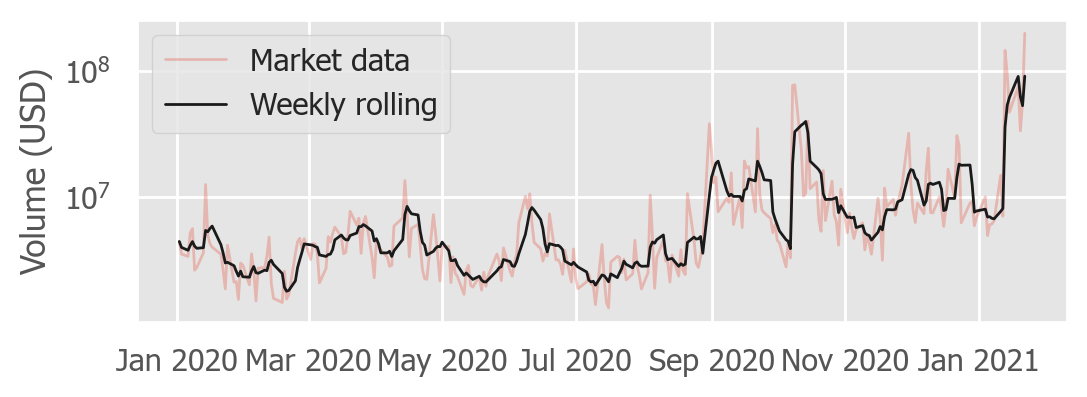

In [25]:
# Libraries
import pandas as pd; import numpy as np; import scipy as scipy; import os
from scipy import stats; import matplotlib.pyplot as plt; import matplotlib.dates as mdates
import matplotlib as mpl; import seaborn as sns; import networkx as nx; import netwulf as nw
os.getcwd()
os.chdir(r'C:\Users\Jakob\OneDrive\Skrivebord\comsocsci2022\Week 2+3')
GME = pd.read_csv('GME.csv', parse_dates=['Date']).set_index('Date')
sub_data = pd.read_csv('wallstreetbets_subs.csv',
                       parse_dates=['Unnamed: 0'], sep=",").set_index('Unnamed: 0')
sub_data.index = sub_data.index.rename('dates')
#print(sub_data) # [14715 r x 5 c]
com_data = pd.read_csv('wallstreetbets_comments.csv',
                       parse_dates=['Unnamed: 0'], sep=",").set_index('Unnamed: 0')
com_data.index = com_data.index.rename('dates')
#print(com_data) # [637131 r x 5 c]

# Setup a function to make our parameters for plotting, so we can call that instead.
def setup_mpl():
    mpl.rcParams['font.family'] = 'Tahoma' # 'Helvetica Neue' is not found.
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl() # Use these parameters.

com_day = com_data.groupby(com_data.index.date).count()
#print(com_day) # [505 x 5]
com_day = com_day.set_index(pd.DatetimeIndex(com_day.index))

# Weekly rolling series
GME_wvol = GME['Volume'].rolling('7D').mean() # Weekly roll mean
com_wvol = com_day.rolling('7D').mean()

# Create plot of HME stock and rolling.
myFmt = mdates.DateFormatter('%b %Y')
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(6,2), dpi=200)
ax.plot(GME.index, GME.Volume, ls='-', alpha=0.3)
ax.plot(GME_wvol.index, GME_wvol.values, color='k', label='1 week rolling')
ax.set_ylabel('Volume (USD)')
ax.set_yscale('log')
ax.xaxis.set_major_formatter(myFmt)
ax.legend(['Market data','Weekly rolling'], loc='upper left')
plt.show()

* Do the same for comments on Reddit per day. Follow same steps as above.

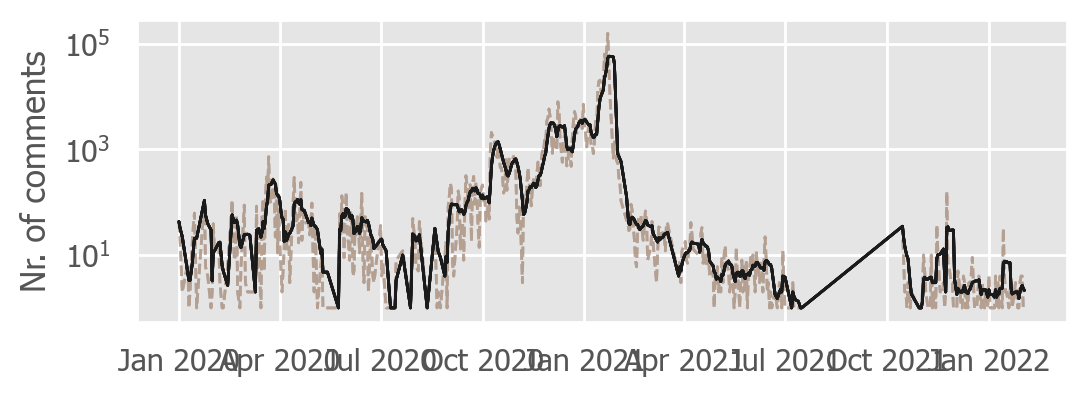

In [26]:
# Comments plot
fig, ax = plt.subplots(figsize=(6,2), dpi=200)
ax.plot(com_day.index, com_day.values, ls='--', alpha=0.3)
ax.plot(com_wvol.index, com_wvol.values, color='k', label='1 week rolling')
ax.set_ylabel('Nr. of comments')
ax.set_yscale('log')
ax.xaxis.set_major_formatter(myFmt)
plt.show()

* What is the advantage of log-scale on y-axis and using a rolling-window?

<font color='orange'> Large quantities of data are generally better for visualization purposes in log-scaled plots.
    
The rolling average window smooths out short-term fluctuations and highlights longer-term trends etc.
</font> 

* What are the <font color='yellow'>**3** </font> most important observations you can draw by looking at the figures?

<font color='orange'> 
<font color='yellow'>(1) </font> Where a lot of traffic can be measured on the subreddit the stock price also started to peak in November 2020 to January 2021.

<font color='yellow'>(2) </font> Magnitudal difference in comments is quite impressive from start to peak traffic measured. ((((((Revise this answer)))))))
    
<font color='yellow'>(3) </font> The smoothing feature of the rolling average for both figures allows us to analyze the trends without the sudden changes skewing perception.
</font> 


### Part 2.2
* Compute daily log-returns of the closing price of GME stock.
* Compute daily log-change in number of new comments.


In [27]:
log_returns = np.log(GME['Close']/GME['Close'].shift(periods=1))
log_com_daily = np.log(com_day['id']/com_day['id'].shift(periods=1))
dfc = pd.DataFrame([log_returns, log_com_daily, GME['Close']]).transpose().dropna(axis=0) # row wise
dfc.columns = ['log_returns', 'log_com_daily', 'Closing Price (USD)']
print('Dataset dfc:\n', dfc)


Dataset dfc:
             log_returns  log_com_daily  Closing Price (USD)
2020-01-09    -0.030171       1.252763             5.550000
2020-01-10    -0.021859      -1.945910             5.430000
2020-01-13     0.000000       2.140066             5.430000
2020-01-14    -0.142251       0.722135             4.710000
2020-01-15    -0.021460       0.571786             4.610000
...                 ...            ...                  ...
2021-01-15    -0.117094       0.041488            35.500000
2021-01-19     0.103217       1.509931            39.360001
2021-01-20    -0.006116      -0.307517            39.119999
2021-01-21     0.095264       0.451573            43.029999
2021-01-22     0.412644       0.764622            65.010002

[199 rows x 3 columns]


* Compute the correlation coefficient between log-returns and log-comments. Is it statistically significant?

<font color='orange'> Yes, as p-val <= 0.05 holds.
</font>

In [28]:
corr = scipy.stats.pearsonr(dfc['log_returns'],dfc['log_com_daily']); 
print('Correlation log_return vs log_com_daily: {:.4f}'.format(corr[0]))
print('P-value: {:.4f}'.format(corr[1]))
# Positive correlation, ie. rise in tandem.

Correlation log_return vs log_com_daily: 0.3042
P-value: 0.0000


* Create scatter plot of daily log-return vs log-change in comments. Color markers for 202 and 2021 in different colors and make the marker size proportional to the Closing price.

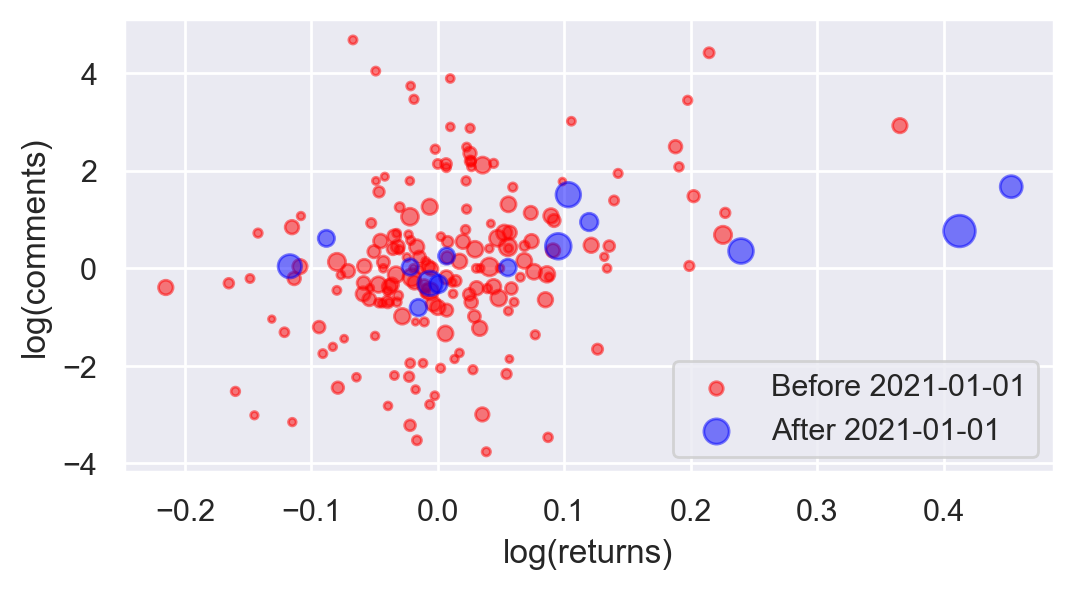

In [29]:
sns.set_theme()
plt.figure( figsize=(6,3), dpi=200)
dfc_end = dfc.loc[dfc.index < '2021-1-1']
dfc_start = dfc.loc[dfc.index > '2021-1-1']

plt.scatter(x=dfc_end['log_returns'], y=dfc_end['log_com_daily'],
            s = dfc_end['Closing Price (USD)']*2, alpha=0.5, color='red', label='Before 2021-01-01')
plt.scatter(x=dfc_start['log_returns'], y=dfc_start['log_com_daily'],
            s = dfc_start['Closing Price (USD)']*2, alpha=0.5, color='blue', label='After 2021-01-01')
plt.xlabel('log(returns)')
plt.ylabel('log(comments)')
plt.legend(loc='lower right')
plt.show()

* What are the <font color='yellow'>**3** </font> most salient observations you can draw by looking at the figure?

<font color='orange'> <font color='yellow'>(1) </font> Smile </font>


<font color='orange'> <font color='yellow'>(2) </font> Smile </font>


<font color='orange'> <font color='yellow'>(3) </font> Smile </font>



* Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on r/wallstreetbets related to the price of the GME stock*?

# Part 3
### Exercises using the NetworkX library
* Solve exercise **2.1**, **2.3**, and **2.5** in your notebook.

# Part 4
### Properties of real-world network of Redditors


### Part 4.1
* Compute the value of *p* such that number of expected edges of random netowrk equals the number of edges in the number of edges in the Reddit network. What is the value of *p*? Compure the average value of the degree < k > using the formula.


Finding *p* such that the condition is met using (3.2):
$$<L>=p * \frac{N(N-1)}{2}$$
Isolating *p*:
$$ p = \frac{2<L>}{N(N-1)}$$

The average value of the degree is found by (3.3):
$$<k> = \frac{2L}{N} = p(N-1)$$


In [30]:
# Since json was corrupted, we redo week 3
com_authors = dict(zip(com_data['id'], com_data['author']))
parent = dict(zip(com_data['id'], com_data['parent_id']))
sub_authors = dict(zip(sub_data['id'], sub_data['author']))
def authID(com_id):
    if parent[com_id][:3] == "t1_":
        auth = com_authors.get(parent[com_id][3:], None)
    else:
        auth = sub_authors.get(parent[com_id][3:], None)
    return auth
com_data['parent_author'] = com_data['id'].apply(authID)
# Index below is sliced so it can actually show us a graph, otherwise computer died.
cd_ = com_data[(com_data.index < '2021-12-01')]
cd_ = cd_.drop(cd_[cd_['author'] == '[deleted]'].index) # remove deleteds
cd_ = cd_.drop(cd_[cd_['parent_author'] == '[deleted]'].index) # Remove deleteds
cd_ = cd_.drop(cd_[cd_['parent_author'].isna()].index) # Remove NaN's
# We make an undirected graph of reciprocal edges. 
edges = cd_.groupby(['author', 'parent_author']).count()
edges = edges.drop(['id', 'link_id', 'parent_id'], axis=1)
G = nx.DiGraph()
# Add all edges and remake to reciprocal.
G.add_weighted_edges_from([ (a, b, edges['score'].loc[(a,b)]) for a, b in edges.index ])
G_U = G.to_undirected(reciprocal=True)
for node, ngbr, w in G_U.edges.data('weight'):
    # Undirected edge weights equal to sum of weights in two corresponding directed edges
    G_U.edges[node, ngbr]['weight'] = (G.edges[node, ngbr]['weight'] + G.edges[ngbr, node]['weight'])
# Finally, remove isolated nodes and self-loops in graph.
G_U.remove_nodes_from(list(nx.isolates(G_U))) 
G_U.remove_edges_from(nx.selfloop_edges(G_U))
print('Nodes: {}'.format(G_U.number_of_nodes()))
print('Edges: {}'.format(G_U.number_of_edges()))
L = len(G_U.edges)
N = len(G_U.nodes)
p = 2*L/(N*(N-1))
print(f'p={p * 100:.2f}%')
k = 2*L/N
print('k: {:.3f}'.format(k))

Nodes: 28544
Edges: 50380
p=0.01%
k: 3.530


* Create a random network with same number of node as the Reddit network and *p* as above. Generate a random network by linking nodes in every possible pair with probability *p*.

In [31]:
Random_graph = nx.generators.random_graphs.erdos_renyi_graph(N,p)

* Visualize the Reddit network and the random network. Comment on the differences.


<font color='orange'> 
Stark difference for the random network vs. real wrt. the lack of local clustering charasteristics. The density of links seem to extend further for the random network.
</font>


### Reddit network
![RedditNetwork](Images/Reddit.png)


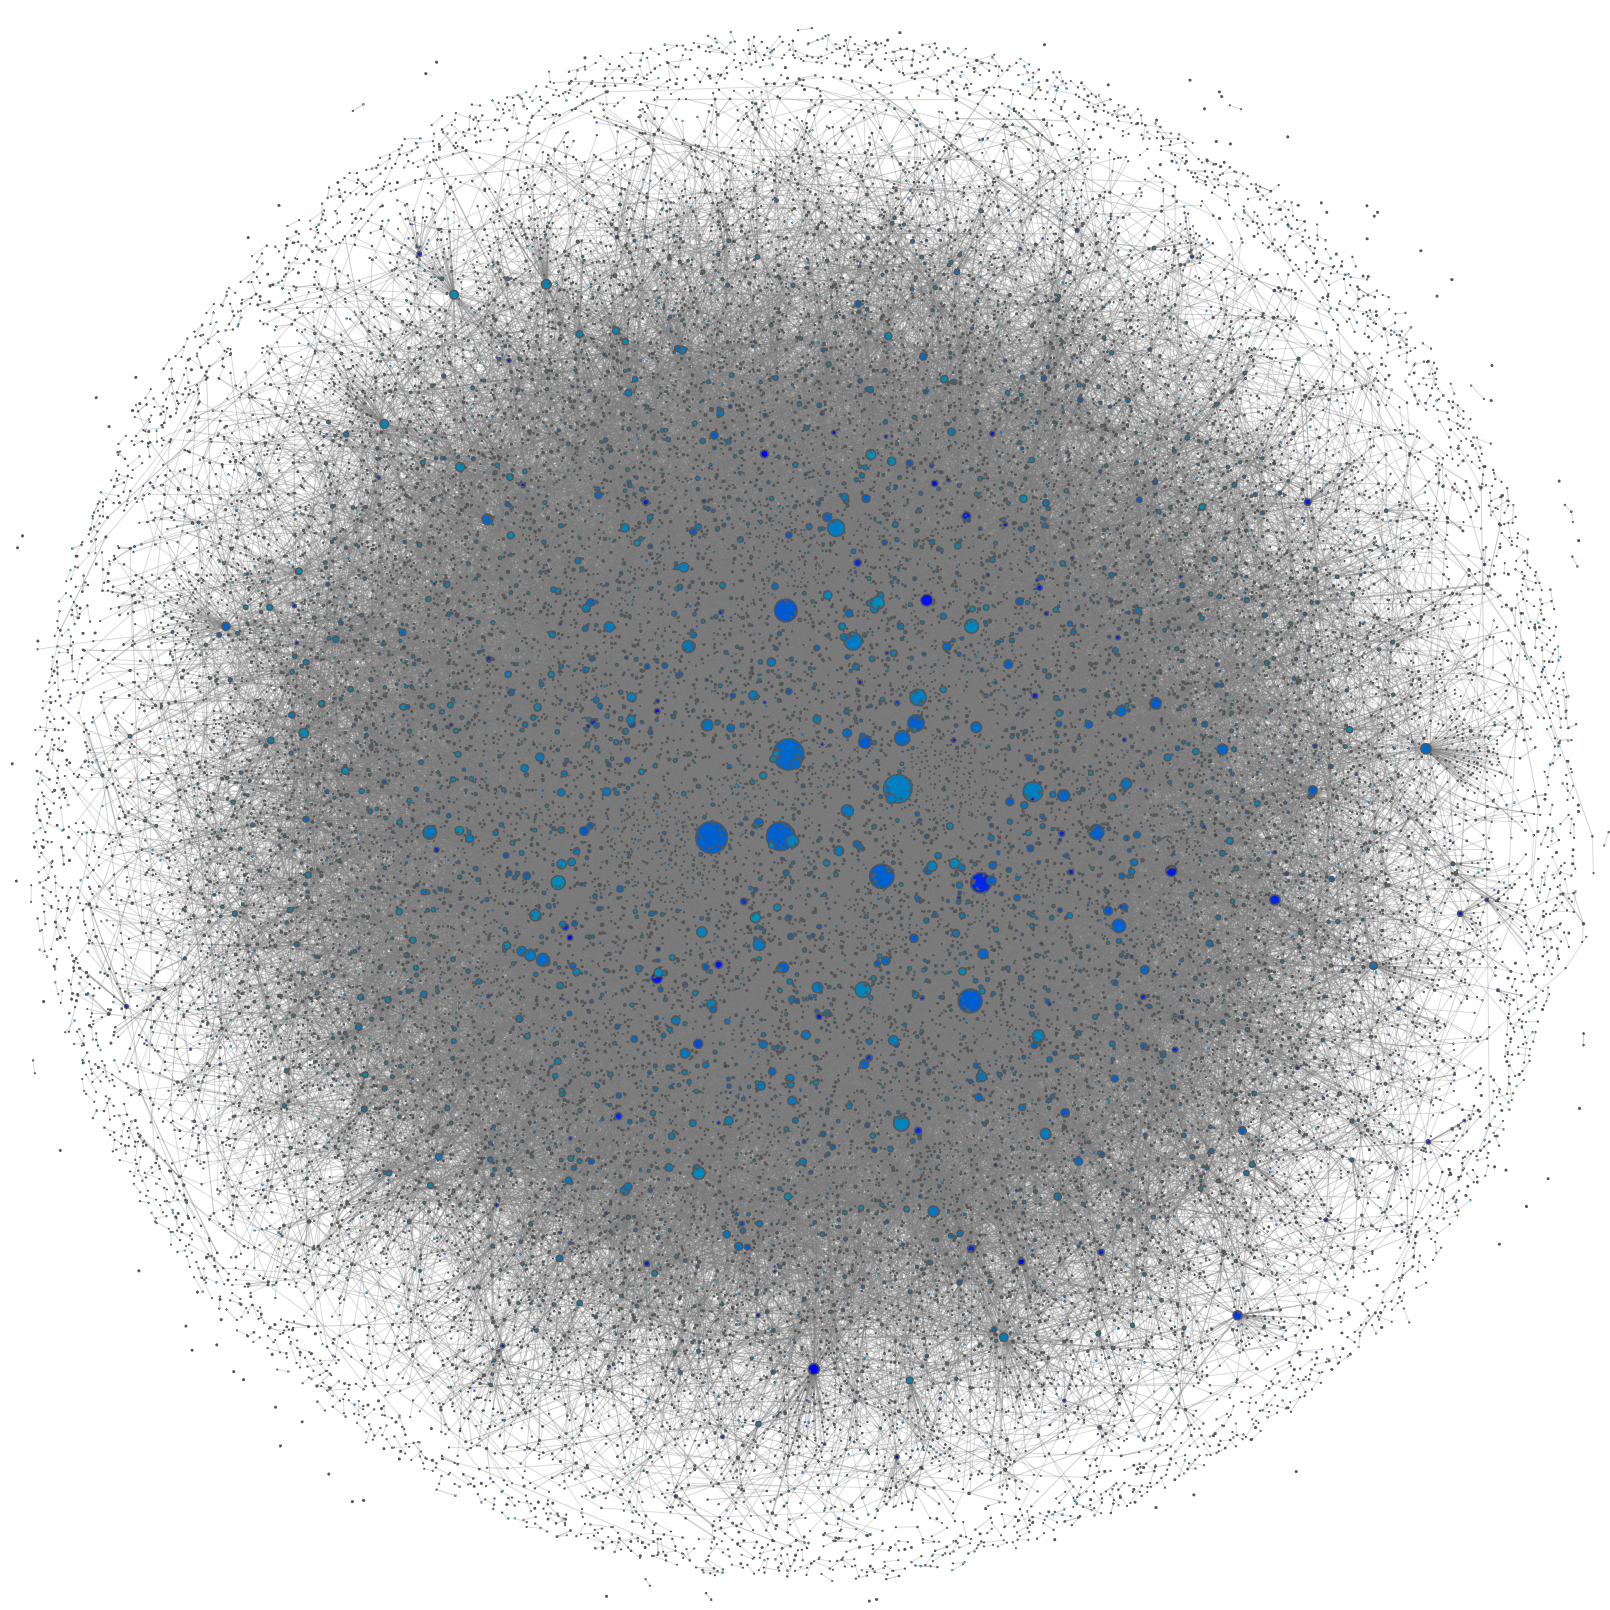

In [1]:
from IPython.display import Image
Image(filename="Images/Reddit.png")

### Random network
![RandomNetwork](Images/Random.png)


### Part 4.2
#### Clustering
* Compute the clustering coefficient for all nodes in the random network using formula (2.15) from the book.
* Compute the average clustering coefficient for nodes in the random and redditors network, respectively. How does it compare to the random counterpart? Is it something you expected? Why?

In [36]:
# Random
degrees = [x[1] for x in Random_graph.degree]
print('minDeg: {} | maxDeg: {}'.format(min(degrees), max(degrees)))
C = []
for node in Random_graph.nodes():
    neighbors = Random_graph.neighbors(node)
    subgraph_neighbors = Random_graph.subgraph(neighbors).copy()
    L_i = len(subgraph_neighbors.edges)
    C.append((2*L_i) / (Random_graph.degree(node) * (Random_graph.degree(node) - 1) + 1e-6)) #Few notes have 
lst = list(nx.clustering(Random_graph).values())
lst = [float(i) for i in lst]
from collections import Counter
Counter(C)

minDeg: 0 | maxDeg: 14


Counter({0.0: 28517,
         0.022222221975308647: 3,
         0.09999999500000024: 8,
         0.03571428507653063: 2,
         0.0476190464852608: 3,
         0.16666665277777895: 7,
         0.33333327777778704: 2,
         0.99999950000025: 1,
         0.027777777391975313: 1})

In [37]:
# Check for method, works out.
print('Book: \n C_avg_book: {:.6f}  |  p_book: {:.6f}'.format(np.mean(C),np.mean(degReddit)/len(degReddit)))
print('Networkx: \n C_avg_nx: {:.6f}  |  p_nx: {:.6f}'.format(np.mean(lst),p))

Book: 
 C_avg_book: 0.000138  |  p_book: 0.000124
Networkx: 
 C_avg_nx: 0.000138  |  p_nx: 0.000124


In [38]:
# Reddit
degReddit = [x[1] for x in G_U.degree]
print('minDeg: {} | maxDeg: {}'.format(min(degReddit), max(degReddit)))
C = []
for node in G_U.nodes():
    neighbors = G_U.neighbors(node)
    subgraph_neighbors = G_U.subgraph(neighbors).copy()
    L_i = len(subgraph_neighbors.edges)
    k_i = G_U.degree(node)
    C.append((2*L_i) / (k_i * (k_i - 1) + 1e-6)) #Few nodes only have k_i = 1
lst = list(nx.clustering(G_U).values())
lst = [float(i) for i in lst]
print('C_avg: {:.6f}  |  p: {:.6f}'.format(np.mean(C),np.mean(degReddit)/len(degReddit)))

minDeg: 0 | maxDeg: 652
C_avg: 0.010054  |  p: 0.000124


<font color='orange'>
    In real networks we would expect clustering to be more locally dense. Hence,  we have several orders of magnitude difference in the clustering coefficient on average across all nodes. In the random network *C* depends on the size, while size does not influence *C* for real networks. We also saw in the plots of the networks, that the random network has no particularly popular nodes, whereas in reality some things gain way more traction wrt. social media than others. Obviously, in reality, particularly in social contexts, not everyone are equally linked. 
</font>